<a href="https://colab.research.google.com/github/bchaithanyasai/PredictLateArrivalsPaper/blob/master/Feature_Selection_and_Predictive_Modelling_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

train_data=pd.read_csv("/content/drive/My Drive/train_data.csv")
test_data=pd.read_csv("/content/drive/My Drive/test_data.csv")

In [0]:
print(train_data.OUTCOME.mean(),test_data.OUTCOME.mean())

0.5 0.2936199407043373


In [0]:
train_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,OUTCOME
0,2015.0,4.000000,11.000000,6.000000,0.308508,0.341235,0.082088,9.000000,80.000000,337.00000,55.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1226.0,1219.000000,4225.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.000000,15.000000,16.000000,25.000000,30.000000,50.000000,15.000000,34.000000,1.0,1.0,1.0,1.0,1.0,0
1,2015.0,7.000000,10.000000,5.000000,0.304283,0.294836,0.130962,7.000000,85.000000,480.00000,68.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1309.0,1302.000000,4446.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.000000,14.000000,16.000000,44.000000,45.000000,10.000000,14.000000,51.000000,1.0,1.0,1.0,1.0,1.0,0
2,2015.0,5.000000,21.000000,4.000000,0.257698,0.238668,0.998464,7.000000,90.000000,425.00000,62.000000,0.0,0.000000,0.0,0.000000,43.000000,0.000000,1282.0,1232.000000,3175.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.000000,12.000000,14.000000,13.000000,20.000000,50.000000,13.000000,20.000000,0.0,0.0,0.0,0.0,0.0,1
3,2015.0,11.000000,13.000000,5.000000,0.282126,0.305712,0.070847,15.000000,306.000000,2370.00000,253.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,81.0,69.000000,4025.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,16.000000,27.000000,35.000000,41.000000,8.000000,42.000000,1.0,1.0,1.0,1.0,1.0,0
4,2015.0,8.000000,14.000000,5.000000,0.316538,0.238668,0.076309,13.000000,120.000000,545.00000,83.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,343.0,237.000000,3545.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,17.000000,3.000000,10.000000,10.000000,15.000000,16.000000,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054813,2015.0,8.127057,18.602376,3.872943,0.254685,0.305712,0.290665,17.127057,120.508227,666.00000,93.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,237.0,346.000000,236.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,10.000000,55.127057,50.000000,50.508227,9.000000,12.254113,1.0,1.0,1.0,1.0,1.0,1
6054814,2015.0,1.512993,24.922040,2.487007,0.273511,0.323033,0.080605,20.948027,174.974013,1075.53898,155.821463,0.0,0.000000,0.0,0.000000,0.000000,0.000000,360.0,310.051973,3973.512993,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,18.000000,45.282483,50.795477,45.769490,16.000000,6.230510,1.0,1.0,1.0,1.0,1.0,1
6054815,2015.0,6.751592,8.745223,3.165605,0.202012,0.299325,0.999615,9.000000,74.834395,295.00000,50.503185,0.0,0.000000,0.0,0.000000,52.165605,0.000000,477.0,480.000000,1964.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,13.000000,14.000000,11.585987,11.254777,26.089172,14.000000,20.585987,0.0,0.0,0.0,0.0,0.0,1
6054816,2015.0,3.000000,13.349001,4.941833,0.319731,0.319792,0.990391,13.587250,129.000000,946.00000,109.116334,0.0,0.529083,0.0,5.290834,32.116334,0.000000,441.0,432.000000,1273.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,12.000000,16.000000,36.174500,55.000000,4.000000,13.000000,49.761750,0.0,0.0,0.0,0.0,0.0,1


In [0]:
test_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,OUTCOME
0,2015,8,20,4,0.261397,0.277054,0.889772,23.0,153.0,930,124.0,0,36.0,0.0,15.0,9.0,0.0,57,15,3078,1,0,0,0,0,0,0,0,0,0,0,0,0,0,17,17,21,59,35,8,18,22,0,0,0,0,0,1
1,2015,11,1,7,0.276077,0.306426,0.160310,14.0,134.0,612,102.0,0,0.0,0.0,0.0,0.0,0.0,19,65,1082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,19,25,25,39,18,39,1,1,1,1,1,0
2,2015,1,8,4,0.254685,0.353796,0.082088,24.0,50.0,152,27.0,0,0.0,0.0,0.0,0.0,0.0,237,386,277,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,13,13,57,2,52,13,21,1,1,1,1,1,0
3,2015,3,12,4,0.319731,0.283453,0.996226,16.0,97.0,550,76.0,0,5.0,0.0,0.0,0.0,45.0,21,91,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,8,9,5,20,57,9,21,0,0,0,0,0,1
4,2015,6,9,2,0.282126,0.287523,0.113494,8.0,165.0,1050,129.0,0,0.0,0.0,0.0,0.0,0.0,1301,1305,4029,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,17,20,28,30,15,17,36,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428430,2015,11,22,7,0.308508,0.284717,1.000000,13.0,212.0,1464,167.0,0,0.0,0.0,0.0,68.0,0.0,85,21,4210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,11,17,49,30,2,13,2,0,0,0,0,0,1
1428431,2015,10,23,5,0.201649,0.238668,0.975365,50.0,133.0,813,99.0,0,23.0,0.0,14.0,20.0,0.0,250,237,547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14,14,17,55,21,34,15,45,0,0,0,0,0,1
1428432,2015,4,29,3,0.318843,0.288808,0.099772,9.0,69.0,255,47.0,0,0.0,0.0,0.0,0.0,0.0,1159,1183,2431,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,16,17,32,35,44,16,41,1,1,1,1,1,0
1428433,2015,12,31,4,0.282422,0.358423,0.063157,10.0,132.0,764,98.0,0,0.0,0.0,0.0,0.0,0.0,410,495,432,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13,13,16,25,35,47,13,35,1,1,1,1,1,0


In [0]:
Y_train=pd.DataFrame(train_data['OUTCOME'])
X_train=train_data.drop("OUTCOME",axis=1)

Y_test=pd.DataFrame(test_data['OUTCOME'])
X_test=test_data.drop("OUTCOME",axis=1)

In [0]:
X_train

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,2015.0,4.000000,11.000000,6.000000,0.308508,0.341235,0.082088,9.000000,80.000000,337.00000,55.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1226.0,1219.000000,4225.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.000000,15.000000,16.000000,25.000000,30.000000,50.000000,15.000000,34.000000,1.0,1.0,1.0,1.0,1.0
1,2015.0,7.000000,10.000000,5.000000,0.304283,0.294836,0.130962,7.000000,85.000000,480.00000,68.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1309.0,1302.000000,4446.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.000000,14.000000,16.000000,44.000000,45.000000,10.000000,14.000000,51.000000,1.0,1.0,1.0,1.0,1.0
2,2015.0,5.000000,21.000000,4.000000,0.257698,0.238668,0.998464,7.000000,90.000000,425.00000,62.000000,0.0,0.000000,0.0,0.000000,43.000000,0.000000,1282.0,1232.000000,3175.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.000000,12.000000,14.000000,13.000000,20.000000,50.000000,13.000000,20.000000,0.0,0.0,0.0,0.0,0.0
3,2015.0,11.000000,13.000000,5.000000,0.282126,0.305712,0.070847,15.000000,306.000000,2370.00000,253.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,81.0,69.000000,4025.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,16.000000,27.000000,35.000000,41.000000,8.000000,42.000000,1.0,1.0,1.0,1.0,1.0
4,2015.0,8.000000,14.000000,5.000000,0.316538,0.238668,0.076309,13.000000,120.000000,545.00000,83.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,343.0,237.000000,3545.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,17.000000,3.000000,10.000000,10.000000,15.000000,16.000000,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6054813,2015.0,8.127057,18.602376,3.872943,0.254685,0.305712,0.290665,17.127057,120.508227,666.00000,93.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,237.0,346.000000,236.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,10.000000,55.127057,50.000000,50.508227,9.000000,12.254113,1.0,1.0,1.0,1.0,1.0
6054814,2015.0,1.512993,24.922040,2.487007,0.273511,0.323033,0.080605,20.948027,174.974013,1075.53898,155.821463,0.0,0.000000,0.0,0.000000,0.000000,0.000000,360.0,310.051973,3973.512993,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,18.000000,45.282483,50.795477,45.769490,16.000000,6.230510,1.0,1.0,1.0,1.0,1.0
6054815,2015.0,6.751592,8.745223,3.165605,0.202012,0.299325,0.999615,9.000000,74.834395,295.00000,50.503185,0.0,0.000000,0.0,0.000000,52.165605,0.000000,477.0,480.000000,1964.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,13.000000,14.000000,11.585987,11.254777,26.089172,14.000000,20.585987,0.0,0.0,0.0,0.0,0.0
6054816,2015.0,3.000000,13.349001,4.941833,0.319731,0.319792,0.990391,13.587250,129.000000,946.00000,109.116334,0.0,0.529083,0.0,5.290834,32.116334,0.000000,441.0,432.000000,1273.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,12.000000,16.000000,36.174500,55.000000,4.000000,13.000000,49.761750,0.0,0.0,0.0,0.0,0.0


In [0]:
X_train[:4285507]

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,2015.0,4.000000,11.0,6.000000,0.308508,0.341235,0.082088,9.000000,80.0,337.0,55.000000,0.0,0.0,0.0,0.0,0.0,0.0,1226.0,1219.0,4225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.000000,15.000000,16.000000,25.000000,30.0,50.0,15.000000,34.000000,1.0,1.0,1.0,1.0,1.0
1,2015.0,7.000000,10.0,5.000000,0.304283,0.294836,0.130962,7.000000,85.0,480.0,68.000000,0.0,0.0,0.0,0.0,0.0,0.0,1309.0,1302.0,4446.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.000000,14.000000,16.000000,44.000000,45.0,10.0,14.000000,51.000000,1.0,1.0,1.0,1.0,1.0
2,2015.0,5.000000,21.0,4.000000,0.257698,0.238668,0.998464,7.000000,90.0,425.0,62.000000,0.0,0.0,0.0,0.0,43.0,0.0,1282.0,1232.0,3175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.000000,12.000000,14.000000,13.000000,20.0,50.0,13.000000,20.000000,0.0,0.0,0.0,0.0,0.0
3,2015.0,11.000000,13.0,5.000000,0.282126,0.305712,0.070847,15.000000,306.0,2370.0,253.000000,0.0,0.0,0.0,0.0,0.0,0.0,81.0,69.0,4025.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,8.000000,16.000000,27.000000,35.0,41.0,8.000000,42.000000,1.0,1.0,1.0,1.0,1.0
4,2015.0,8.000000,14.0,5.000000,0.316538,0.238668,0.076309,13.000000,120.0,545.0,83.000000,0.0,0.0,0.0,0.0,0.0,0.0,343.0,237.0,3545.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,15.000000,17.000000,3.000000,10.0,10.0,15.000000,16.000000,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285502,2015.0,10.000000,6.0,2.000000,0.276684,0.340097,0.130962,9.000000,170.0,1092.0,148.000000,0.0,0.0,0.0,0.0,0.0,0.0,1257.0,1268.0,1722.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.000000,19.000000,22.000000,14.000000,15.0,5.0,19.000000,23.000000,1.0,1.0,1.0,1.0,1.0
4285503,2015.0,8.000000,22.0,6.000000,0.254685,0.300638,0.082088,13.000000,136.0,821.0,113.000000,0.0,0.0,0.0,0.0,0.0,0.0,397.0,524.0,229.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.000000,11.000000,13.000000,50.000000,55.0,11.0,12.000000,3.000000,1.0,1.0,1.0,1.0,1.0
4285504,2015.0,2.000000,8.0,7.000000,0.298798,0.341235,0.070847,26.000000,163.0,954.0,144.000000,0.0,15.0,0.0,0.0,0.0,0.0,1005.0,935.0,4154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.000000,12.000000,15.000000,47.000000,55.0,38.0,13.000000,13.000000,0.0,0.0,0.0,0.0,0.0
4285505,2015.0,4.000000,5.0,7.000000,0.205637,0.313753,0.091677,8.000000,52.0,216.0,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,636.0,637.0,2231.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,15.000000,15.000000,56.000000,0.0,52.0,15.000000,4.000000,1.0,1.0,1.0,1.0,1.0


In [0]:
Y_train

,OUTCOME
0,0
1,0
2,1
3,0
4,0
...,...
6054813,1
6054814,1
6054815,1
6054816,1


In [0]:
X_test

,YEAR,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,AIR_TIME,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_ORIGIN_AIRPORT,AIRLINE_DESTINATION_AIRPORT,ORIGIN_AIRPORT_DESTINATION_AIRPORT,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DEPARTURE_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,DEPARTURE_TIME_MINUTE,SCHEDULED_DEPARTURE_MINUTE,SCHEDULED_ARRIVAL_MINUTE,WHEELS_OFF_HOUR,WHEELS_OFF_MINUTE,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,2015,8,20,4,0.261397,0.277054,0.889772,23.0,153.0,930,124.0,0,36.0,0.0,15.0,9.0,0.0,57,15,3078,1,0,0,0,0,0,0,0,0,0,0,0,0,0,17,17,21,59,35,8,18,22,0,0,0,0,0
1,2015,11,1,7,0.276077,0.306426,0.160310,14.0,134.0,612,102.0,0,0.0,0.0,0.0,0.0,0.0,19,65,1082,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,19,25,25,39,18,39,1,1,1,1,1
2,2015,1,8,4,0.254685,0.353796,0.082088,24.0,50.0,152,27.0,0,0.0,0.0,0.0,0.0,0.0,237,386,277,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,13,13,57,2,52,13,21,1,1,1,1,1
3,2015,3,12,4,0.319731,0.283453,0.996226,16.0,97.0,550,76.0,0,5.0,0.0,0.0,0.0,45.0,21,91,1380,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,8,9,5,20,57,9,21,0,0,0,0,0
4,2015,6,9,2,0.282126,0.287523,0.113494,8.0,165.0,1050,129.0,0,0.0,0.0,0.0,0.0,0.0,1301,1305,4029,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,17,20,28,30,15,17,36,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428430,2015,11,22,7,0.308508,0.284717,1.000000,13.0,212.0,1464,167.0,0,0.0,0.0,0.0,68.0,0.0,85,21,4210,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12,11,17,49,30,2,13,2,0,0,0,0,0
1428431,2015,10,23,5,0.201649,0.238668,0.975365,50.0,133.0,813,99.0,0,23.0,0.0,14.0,20.0,0.0,250,237,547,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14,14,17,55,21,34,15,45,0,0,0,0,0
1428432,2015,4,29,3,0.318843,0.288808,0.099772,9.0,69.0,255,47.0,0,0.0,0.0,0.0,0.0,0.0,1159,1183,2431,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,16,17,32,35,44,16,41,1,1,1,1,1
1428433,2015,12,31,4,0.282422,0.358423,0.063157,10.0,132.0,764,98.0,0,0.0,0.0,0.0,0.0,0.0,410,495,432,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13,13,16,25,35,47,13,35,1,1,1,1,1


In [0]:
Y_test

,OUTCOME
0,1
1,0
2,0
3,1
4,0
...,...
1428430,1
1428431,1
1428432,0
1428433,0


In [0]:
####Unused as it would be used for regression problems
from sklearn.feature_selection import SelectPercentile, f_regression                      
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X,y)
for n,s in zip(Unhandled_data.feature_names,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s " % (s,n))
Selector_f.get_support(True)

In [4]:
X_train.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'SCHEDULED_TIME',
       'DISTANCE', 'AIR_TIME', 'DIVERTED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', 'ORIGIN_AIRPORT_DESTINATION_AIRPORT',
       'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US',
       'VX', 'WN', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_ARRIVAL_HOUR', 'DEPARTURE_TIME_MINUTE',
       'SCHEDULED_DEPARTURE_MINUTE', 'SCHEDULED_ARRIVAL_MINUTE',
       'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing',
       'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing',
       'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing'],
      dtype='object')

In [0]:
from sklearn.feature_selection import SelectPercentile, f_classif
Selector_f = SelectPercentile(f_classif, percentile=25)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s" % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F-score: nant for feature YEAR
F-score: 20994.57t for feature MONTH
F-score: 465.26t for feature DAY
F-score: 1357.67t for feature DAY_OF_WEEK
F-score: 45887.35t for feature ORIGIN_AIRPORT
F-score: 31786.85t for feature DESTINATION_AIRPORT
F-score: 5060519.01t for feature DEPARTURE_DELAY
F-score: 436147.33t for feature TAXI_OUT
F-score: 30.21t for feature SCHEDULED_TIME
F-score: 319.48t for feature DISTANCE
F-score: 6958.08t for feature AIR_TIME
F-score: nant for feature DIVERTED
F-score: 394931.17t for feature AIR_SYSTEM_DELAY
F-score: 2366.62t for feature SECURITY_DELAY
F-score: 274327.67t for feature AIRLINE_DELAY
F-score: 507572.07t for feature LATE_AIRCRAFT_DELAY
F-score: 34800.73t for feature WEATHER_DELAY
F-score: 8031.96t for feature AIRLINE_ORIGIN_AIRPORT
F-score: 8412.68t for feature AIRLINE_DESTINATION_AIRPORT
F-score: 11.39t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT
F-score: 216.02t for feature AA
F-score: 2326.96t for feature AS
F-score: 1905.15t for feature B6
F-scor

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 11] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [0]:
from sklearn.feature_selection import SelectPercentile, f_classif
Selector_f = SelectPercentile(f_classif, percentile=50)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s" % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F-score: nant for feature YEAR
F-score: 20994.57t for feature MONTH
F-score: 465.26t for feature DAY
F-score: 1357.67t for feature DAY_OF_WEEK
F-score: 45887.35t for feature ORIGIN_AIRPORT
F-score: 31786.85t for feature DESTINATION_AIRPORT
F-score: 5060519.01t for feature DEPARTURE_DELAY
F-score: 436147.33t for feature TAXI_OUT
F-score: 30.21t for feature SCHEDULED_TIME
F-score: 319.48t for feature DISTANCE
F-score: 6958.08t for feature AIR_TIME
F-score: nant for feature DIVERTED
F-score: 394931.17t for feature AIR_SYSTEM_DELAY
F-score: 2366.62t for feature SECURITY_DELAY
F-score: 274327.67t for feature AIRLINE_DELAY
F-score: 507572.07t for feature LATE_AIRCRAFT_DELAY
F-score: 34800.73t for feature WEATHER_DELAY
F-score: 8031.96t for feature AIRLINE_ORIGIN_AIRPORT
F-score: 8412.68t for feature AIRLINE_DESTINATION_AIRPORT
F-score: 11.39t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT
F-score: 216.02t for feature AA
F-score: 2326.96t for feature AS
F-score: 1905.15t for feature B6
F-scor

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 11] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [0]:
from sklearn.feature_selection import SelectPercentile, f_classif
Selector_f = SelectPercentile(f_classif, percentile=75)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print("F-score: %3.2ft for feature %s" % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F-score: nant for feature YEAR
F-score: 20994.57t for feature MONTH
F-score: 465.26t for feature DAY
F-score: 1357.67t for feature DAY_OF_WEEK
F-score: 45887.35t for feature ORIGIN_AIRPORT
F-score: 31786.85t for feature DESTINATION_AIRPORT
F-score: 5060519.01t for feature DEPARTURE_DELAY
F-score: 436147.33t for feature TAXI_OUT
F-score: 30.21t for feature SCHEDULED_TIME
F-score: 319.48t for feature DISTANCE
F-score: 6958.08t for feature AIR_TIME
F-score: nant for feature DIVERTED
F-score: 394931.17t for feature AIR_SYSTEM_DELAY
F-score: 2366.62t for feature SECURITY_DELAY
F-score: 274327.67t for feature AIRLINE_DELAY
F-score: 507572.07t for feature LATE_AIRCRAFT_DELAY
F-score: 34800.73t for feature WEATHER_DELAY
F-score: 8031.96t for feature AIRLINE_ORIGIN_AIRPORT
F-score: 8412.68t for feature AIRLINE_DESTINATION_AIRPORT
F-score: 11.39t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT
F-score: 216.02t for feature AA
F-score: 2326.96t for feature AS
F-score: 1905.15t for feature B6
F-scor

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 0 11] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [0]:
from sklearn.feature_selection import SelectPercentile, chi2
Selector_f = SelectPercentile(chi2, percentile=25)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print('F-score: %3.2ft for feature %s ' % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

F-score: 0.00t for feature YEAR 
F-score: 35026.84t for feature MONTH 
F-score: 2123.78t for feature DAY 
F-score: 1232.63t for feature DAY_OF_WEEK 
F-score: 190.28t for feature ORIGIN_AIRPORT 
F-score: 92.66t for feature DESTINATION_AIRPORT 
F-score: 940956.15t for feature DEPARTURE_DELAY 
F-score: 2344154.23t for feature TAXI_OUT 
F-score: 1208.02t for feature SCHEDULED_TIME 
F-score: 143425.28t for feature DISTANCE 
F-score: 321832.48t for feature AIR_TIME 
F-score: nant for feature DIVERTED 
F-score: 24114100.87t for feature AIR_SYSTEM_DELAY 
F-score: 113239.16t for feature SECURITY_DELAY 
F-score: 34816756.63t for feature AIRLINE_DELAY 
F-score: 43592722.61t for feature LATE_AIRCRAFT_DELAY 
F-score: 5045192.67t for feature WEATHER_DELAY 
F-score: 2340246.60t for feature AIRLINE_ORIGIN_AIRPORT 
F-score: 2452913.37t for feature AIRLINE_DESTINATION_AIRPORT 
F-score: 8882.95t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT 
F-score: 189.26t for feature AA 
F-score: 2258.94t for feature

In [0]:
from sklearn.feature_selection import SelectPercentile, chi2
Selector_f = SelectPercentile(chi2, percentile=50)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print('F-score: %3.2ft for feature %s ' % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

F-score: 0.00t for feature YEAR 
F-score: 35026.84t for feature MONTH 
F-score: 2123.78t for feature DAY 
F-score: 1232.63t for feature DAY_OF_WEEK 
F-score: 190.28t for feature ORIGIN_AIRPORT 
F-score: 92.66t for feature DESTINATION_AIRPORT 
F-score: 940956.15t for feature DEPARTURE_DELAY 
F-score: 2344154.23t for feature TAXI_OUT 
F-score: 1208.02t for feature SCHEDULED_TIME 
F-score: 143425.28t for feature DISTANCE 
F-score: 321832.48t for feature AIR_TIME 
F-score: nant for feature DIVERTED 
F-score: 24114100.87t for feature AIR_SYSTEM_DELAY 
F-score: 113239.16t for feature SECURITY_DELAY 
F-score: 34816756.63t for feature AIRLINE_DELAY 
F-score: 43592722.61t for feature LATE_AIRCRAFT_DELAY 
F-score: 5045192.67t for feature WEATHER_DELAY 
F-score: 2340246.60t for feature AIRLINE_ORIGIN_AIRPORT 
F-score: 2452913.37t for feature AIRLINE_DESTINATION_AIRPORT 
F-score: 8882.95t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT 
F-score: 189.26t for feature AA 
F-score: 2258.94t for feature

In [0]:
from sklearn.feature_selection import SelectPercentile, chi2
Selector_f = SelectPercentile(chi2, percentile=75)
Selector_f.fit(X_train,Y_train)
for n,s in zip(X_train.columns,Selector_f.scores_):
 print('F-score: %3.2ft for feature %s ' % (s,n))
print(X_train.columns[Selector_f.get_support(True)])

F-score: 0.00t for feature YEAR 
F-score: 35026.84t for feature MONTH 
F-score: 2123.78t for feature DAY 
F-score: 1232.63t for feature DAY_OF_WEEK 
F-score: 190.28t for feature ORIGIN_AIRPORT 
F-score: 92.66t for feature DESTINATION_AIRPORT 
F-score: 940956.15t for feature DEPARTURE_DELAY 
F-score: 2344154.23t for feature TAXI_OUT 
F-score: 1208.02t for feature SCHEDULED_TIME 
F-score: 143425.28t for feature DISTANCE 
F-score: 321832.48t for feature AIR_TIME 
F-score: nant for feature DIVERTED 
F-score: 24114100.87t for feature AIR_SYSTEM_DELAY 
F-score: 113239.16t for feature SECURITY_DELAY 
F-score: 34816756.63t for feature AIRLINE_DELAY 
F-score: 43592722.61t for feature LATE_AIRCRAFT_DELAY 
F-score: 5045192.67t for feature WEATHER_DELAY 
F-score: 2340246.60t for feature AIRLINE_ORIGIN_AIRPORT 
F-score: 2452913.37t for feature AIRLINE_DESTINATION_AIRPORT 
F-score: 8882.95t for feature ORIGIN_AIRPORT_DESTINATION_AIRPORT 
F-score: 189.26t for feature AA 
F-score: 2258.94t for feature

In [0]:
from sklearn.model_selection import train_test_split
val_df, test_df = train_test_split(test_data, test_size=0.333, random_state=0)

#Y_train=pd.DataFrame(train_data['OUTCOME'])
#X_train=train_data.drop("OUTCOME",axis=1)

Y_test=pd.DataFrame(test_df['OUTCOME'])
X_test=test_df.drop("OUTCOME",axis=1)

Y_valid=pd.DataFrame(val_df['OUTCOME'])
X_valid=val_df.drop("OUTCOME",axis=1)

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score
from sklearn import metrics

def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, scoring={'accuracy':make_scorer(accuracy_score),'roc_auc':make_scorer(roc_auc_score)},cv=5)
  print("Cross-validated scores:", scores)
  print("cross for accuracy",scores['test_accuracy'])
  print("cross for roc-auc",scores['test_roc_auc'])

In [0]:
from sklearn import metrics
def report(Y_test,pred):
  score1=metrics.roc_auc_score(Y_test,pred)
  score2=metrics.accuracy_score(Y_test,pred)

  print(f"Test ROC AUC score: {score1}")
  print(f"Test accuracy score: {score2}")
  print("Confusion matrix is ",metrics.confusion_matrix(Y_test,pred))
  print("Classification report is \n",metrics.classification_report(Y_test,pred))
  print("\n")

In [0]:
from math import log
from sklearn.metrics import mean_squared_error

def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic

def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic
  
def aic_and_bic(Y_test,pred,num_params):
  mse=mean_squared_error(Y_test,pred)
  print(pred)
  print('Number of parameters: %d' % (num_params))
  aic=calculate_aic(len(Y_train), mse, num_params)
  print('AIC: %.3f' % aic)
  bic = calculate_bic(len(y), mse, num_params)
  print('BIC: %.3f' % bic)

In [0]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import *
from sklearn.svm import *

import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [14]:
cols=['MONTH','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY','TAXI_OUT','DISTANCE','SCHEDULED_TIME',
'AIR_SYSTEM_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','SECURITY_DELAY','AIRLINE_ORIGIN_AIRPORT','AIRLINE_DESTINATION_AIRPORT',
'DEPARTURE_TIME_HOUR','WHEELS_OFF_MINUTE',
'AIR_SYSTEM_DELAY_is_missing','SECURITY_DELAY_is_missing','AIRLINE_DELAY_is_missing','LATE_AIRCRAFT_DELAY_is_missing','WEATHER_DELAY_is_missing']
print(cols)#'SCHEDULED_DEPARTURE_HOUR','SCHEDULED_ARRIVAL_HOUR','WHEELS_OFF_HOUR',
print(len(cols))

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']
21


In [0]:
from sklearn.feature_selection import RFECV
from lightgbm import LGBMClassifier

selected_X_train=X_train[cols]
print(selected_X_train)

lgbmclassifier=LGBMClassifier()
selector = RFECV(estimator=lgbmclassifier, cv=5,scoring='accuracy',n_jobs=1)
selector.fit(selected_X_train,Y_train)
print("Optimal number of features: %d" % selector.n_features_)
print(selected_X_train.columns[selector.support_])
print(selector.ranking_)

             MONTH  ...  WEATHER_DELAY_is_missing
0         4.000000  ...                       1.0
1         7.000000  ...                       1.0
2         5.000000  ...                       0.0
3        11.000000  ...                       1.0
4         8.000000  ...                       1.0
...            ...  ...                       ...
6054813   8.127057  ...                       1.0
6054814   1.512993  ...                       1.0
6054815   6.751592  ...                       0.0
6054816   3.000000  ...                       0.0
6054817   6.210935  ...                       0.0

[6054818 rows x 24 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features: 13
Index(['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR',
       'AIR_SYSTEM_DELAY_is_missing'],
      dtype='object')
[ 1  1  1  1  1  1  1  4  6  8 10 12  1  1  2  1  1  1  3  1  5  7  9 11]


In [15]:
from sklearn.feature_selection import RFECV
from lightgbm import LGBMClassifier

selected_X_train=X_train[cols]
print(selected_X_train)

lgbmclassifier=LGBMClassifier()
selector = RFECV(estimator=lgbmclassifier, cv=5,scoring='accuracy',n_jobs=1)
selector.fit(selected_X_train,Y_train)
print("Optimal number of features: %d" % selector.n_features_)
print(selected_X_train.columns[selector.support_])
print(selector.ranking_)

             MONTH  ...  WEATHER_DELAY_is_missing
0         4.000000  ...                       1.0
1         7.000000  ...                       1.0
2         5.000000  ...                       0.0
3        11.000000  ...                       1.0
4         8.000000  ...                       1.0
...            ...  ...                       ...
6054813   8.127057  ...                       1.0
6054814   1.512993  ...                       1.0
6054815   6.751592  ...                       0.0
6054816   3.000000  ...                       0.0
6054817   6.210935  ...                       0.0

[6054818 rows x 21 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features: 10
Index(['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', 'AIR_SYSTEM_DELAY_is_missing'],
      dtype='object')
[ 1  1  1  1  1  1  1  7  9 11 12 10  1  1  2  6  1  5  4  3  8]


             MONTH  ...  WEATHER_DELAY_is_missing
0         4.000000  ...                       1.0
1         7.000000  ...                       1.0
2         5.000000  ...                       0.0
3        11.000000  ...                       1.0
4         8.000000  ...                       1.0
...            ...  ...                       ...
6054813   8.127057  ...                       1.0
6054814   1.512993  ...                       1.0
6054815   6.751592  ...                       0.0
6054816   3.000000  ...                       0.0
6054817   6.210935  ...                       0.0

[6054818 rows x 24 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[238 213  42 704 747 284 360   0   0   0   0   0 196  72  10  12  28  14
   0  80   0   0   0   0]


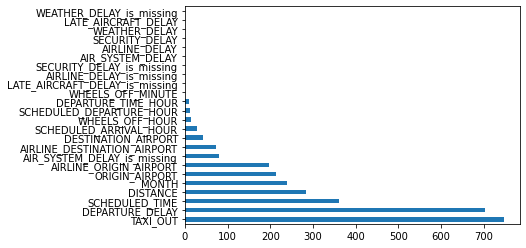

In [0]:
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

selected_X_train=X_train[cols]
print(selected_X_train)

model = LGBMClassifier()
model.fit(selected_X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=selected_X_train.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

In [10]:
cols_after_removing_recursive=['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE_HOUR',
       'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR',
       'AIR_SYSTEM_DELAY_is_missing']
print(len(cols_after_removing_recursive))

13


In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpBernoulliNBModel():
  model = BernoulliNB()
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runexpBernoulliNBModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8176742955101963
Test accuracy score: 0.8929310749176547
Confusion matrix is  [[1009018       0]
 [ 152941  266476]]
Classification report is 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93   1009018
           1       1.00      0.64      0.78    419417

    accuracy                           0.89   1428435
   macro avg       0.93      0.82      0.85   1428435
weighted avg       0.91      0.89      0.88   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Cross-validated scores: {'fit_time': array([4.02533007, 2.54916596, 2.55393291, 2.55440617, 2.59539628]), 'score_time': array([0.74628329, 0.73334026, 0.73816514, 0.75022101, 0.73059821]), 'test_accuracy': array([0.89224958, 0.89253475, 0.89226873, 0.89243149, 0.89311053]), 'test_roc_auc': array([0.81649046, 0.81697576, 0.81652325, 0.81680045, 0.81795692])}
cross for accuracy [0.89224958 0.89253475 0.89226873 0.89243149 0.89311053]
cross for roc-auc [0.81649046 0.81697576 0.81652325 0.81680045 0.81795692]


In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpLinearSVCModel():
  model = LinearSVC()
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runexpLinearSVCModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8702226924092784
Test accuracy score: 0.8776304137045088
Confusion matrix is  [[896179 112839]
 [ 61958 357459]]
Classification report is 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91   1009018
           1       0.76      0.85      0.80    419417

    accuracy                           0.88   1428435
   macro avg       0.85      0.87      0.86   1428435
weighted avg       0.88      0.88      0.88   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: Data

Cross-validated scores: {'fit_time': array([3081.71970844, 3051.46147275, 2886.84516859, 2654.25043535,
       2552.9044137 ]), 'score_time': array([0.54690695, 0.55531693, 0.58428001, 0.71781397, 0.70923042]), 'test_accuracy': array([0.87662639, 0.90151542, 0.89231336, 0.91299524, 0.73374327]), 'test_roc_auc': array([0.84201889, 0.83442459, 0.81856845, 0.87189416, 0.76420607])}
cross for accuracy [0.87662639 0.90151542 0.89231336 0.91299524 0.73374327]
cross for roc-auc [0.84201889 0.83442459 0.81856845 0.87189416 0.76420607]


In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpLGBMClassifierModel():
  model = LGBMClassifier(random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runexpLGBMClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8835184663748327
Test accuracy score: 0.9192360870463129
Confusion matrix is  [[978800  30218]
 [ 85148 334269]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94   1009018
           1       0.92      0.80      0.85    419417

    accuracy                           0.92   1428435
   macro avg       0.92      0.88      0.90   1428435
weighted avg       0.92      0.92      0.92   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([41.22812128, 40.24779701, 39.54788852, 39.78039384, 39.87078381]), 'score_time': array([3.31302762, 3.32302547, 3.34789038, 3.37988997, 3.29774284]), 'test_accuracy': array([0.9203335 , 0.92077008, 0.92059507, 0.92129774, 0.92163113]), 'test_roc_auc': array([0.87939089, 0.88030232, 0.87978335, 0.88089036, 0.88147384])}
cross for accuracy [0.9203335  0.92077008 0.92059507 0.92129774 0.92163113]
cross for roc-auc [0.87939089 0.88030232 0.87978335 0.88089036 0.88147384]


In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpDecisionTreeModel():
  tree = DecisionTreeClassifier(random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  tree.fit(sel_X_train, Y_train)
  pred=tree.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(tree,X,y)

runexpDecisionTreeModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']
predictions are  [0 1 0 ... 0 0 1]
Test ROC AUC score: 0.8534604689864477
Test accuracy score: 0.8752767155311781
Confusion matrix is  [[304381  31424]
 [ 27903 111961]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91    335805
           1       0.78      0.80      0.79    139864

    accuracy                           0.88    475669
   macro avg       0.85      0.85      0.85    475669


In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runexpRandomForestModel():
  forest = RandomForestClassifier(max_features=16,max_depth=25,min_samples_leaf=10,random_state=10)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  forest.fit(sel_X_train, Y_train)
  pred=forest.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)                                         #91.87
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(forest,X,y)

runexpRandomForestModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8820867826754215
Test accuracy score: 0.9205585133380237
Confusion matrix is  [[984088  24930]
 [ 88547 330870]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95   1009018
           1       0.93      0.79      0.85    419417

    accuracy                           0.92   1428435
   macro avg       0.92      0.88      0.90   1428435
weighted avg       0.92      0.92      0.92   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Cross-validated scores: {'fit_time': array([6110.38994956, 4488.80710149, 4275.5737865 , 4204.35399055,
       4153.96794605]), 'score_time': array([41.55245614, 41.19122052, 39.72275329, 41.90458846, 40.24595284]), 'test_accuracy': array([0.92165833, 0.92206779, 0.92205903, 0.92246593, 0.92285358]), 'test_roc_auc': array([0.88105758, 0.88187055, 0.8817018 , 0.88237476, 0.88290781])}
cross for accuracy [0.92165833 0.92206779 0.92205903 0.92246593 0.92285358]
cross for roc-auc [0.88105758 0.88187055 0.8817018  0.88237476 0.88290781]


In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runLogisticRegressionModel():
  lrmodel=LogisticRegression()
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  lrmodel.fit(sel_X_train, Y_train)
  pred=lrmodel.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(lrmodel,X,y)
  num_params = len(lrmodel.coef_) + 1
  aic_and_bic(Y_test,pred,num_params)

runLogisticRegressionModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


predictions are  [0 1 0 ... 0 0 1]
Test ROC AUC score: 0.8296774206409845
Test accuracy score: 0.8885107080764145
Confusion matrix is  [[326571   9234]
 [ 43798  96066]]
Classification report is 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92    335805
           1       0.91      0.69      0.78    139864

    accuracy                           0.89    475669
   macro avg       0.90      0.83      0.85    475669
weighted avg       0.89      0.89      0.88    475669





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Cross-validated scores: {'fit_time': array([67.50734687, 65.93810582, 66.96874094, 66.1269958 , 65.12360954]), 'score_time': array([0.41015744, 0.42351747, 0.41843605, 0.40717268, 0.41280127]), 'test_accuracy': array([0.8936544 , 0.89500911, 0.89364285, 0.89404716, 0.8939663 ]), 'test_roc_auc': array([0.82146836, 0.82712552, 0.82564117, 0.82180698, 0.82085378])}
cross for accuracy [0.8936544  0.89500911 0.89364285 0.89404716 0.8939663 ]
cross for roc-auc [0.82146836 0.82712552 0.82564117 0.82180698 0.82085378]
[0 1 0 ... 0 0 1]
Number of parameters: 2
AIC: -13283217.569


NameError: ignored

In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runXGBClassifierModel():
  model=XGBClassifier()
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runXGBClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12:14:03] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8799539221752859
Test accuracy score: 0.9069905175944303
Confusion matrix is  [[953982  55036]
 [ 77822 341595]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93   1009018
           1       0.86      0.81      0.84    419417

    accuracy                           0.91   1428435
   macro avg       0.89      0.88      0.89   1428435
weighted avg       0.91      0.91      0.91   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13:00:04] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13:33:07] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14:06:18] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14:39:28] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15:12:40] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Cross-validated scores: {'fit_time': array([1982.48600912, 1986.70746088, 1986.53589177, 1987.457937  ,
       1982.43312955]), 'score_time': array([3.77771521, 3.85807991, 3.84304357, 3.85526156, 3.86914086]), 'test_accuracy': array([0.91359997, 0.91408205, 0.91418706, 0.91419406, 0.91461583]), 'test_roc_auc': array([0.8665095 , 0.86698104, 0.86721075, 0.86698055, 0.86812215])}
cross for accuracy [0.91359997 0.91408205 0.91418706 0.91419406 0.91461583]
cross for roc-auc [0.8665095  0.86698104 0.86721075 0.86698055 0.86812215]


In [0]:
import numpy as np

sel_cols=cols
print(sel_cols)

def runLGBMClassifierModel():
  model=LGBMClassifier(max_bin=175,num_leaves=150,lambda_l1=2,lambda_l2=2,max_depth=100)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runLGBMClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8864658355968845
Test accuracy score: 0.9229394407165884
Confusion matrix is  [[983622  25396]
 [ 84680 334737]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95   1009018
           1       0.93      0.80      0.86    419417

    accuracy                           0.92   1428435
   macro avg       0.93      0.89      0.90   1428435
weighted avg       0.92      0.92      0.92   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([60.28556156, 58.70853829, 59.37966013, 59.14075065, 58.98669577]), 'score_time': array([4.36771607, 4.28731585, 4.35411382, 4.39645362, 4.26688361]), 'test_accuracy': array([0.92274514, 0.92301722, 0.92293759, 0.92366826, 0.92380564]), 'test_roc_auc': array([0.8837847 , 0.88449522, 0.88409949, 0.8850948 , 0.88547858])}
cross for accuracy [0.92274514 0.92301722 0.92293759 0.92366826 0.92380564]
cross for roc-auc [0.8837847  0.88449522 0.88409949 0.8850948  0.88547858]


In [0]:
import numpy as np
sel_cols=cols
print(sel_cols)

def runLGBMClassifierModel():
  model=LGBMClassifier(max_bin=150,num_leaves=150,lambda_l1=5,lambda_l2=5,max_depth=90,bagging_fraction=0.8)#decrease bagging_fraction
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runLGBMClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8863051495392817
Test accuracy score: 0.9228610332286733
Confusion matrix is  [[983661  25357]
 [ 84831 334586]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95   1009018
           1       0.93      0.80      0.86    419417

    accuracy                           0.92   1428435
   macro avg       0.93      0.89      0.90   1428435
weighted avg       0.92      0.92      0.92   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([59.39565849, 59.75253558, 58.57243896, 58.77869701, 60.90981364]), 'score_time': array([4.42929626, 4.32503486, 4.49348521, 4.35506034, 4.42180252]), 'test_accuracy': array([0.92274339, 0.92305047, 0.92290084, 0.923509  , 0.92384327]), 'test_roc_auc': array([0.88380785, 0.88453791, 0.88411963, 0.88505175, 0.88558011])}
cross for accuracy [0.92274339 0.92305047 0.92290084 0.923509   0.92384327]
cross for roc-auc [0.88380785 0.88453791 0.88411963 0.88505175 0.88558011]


In [0]:
import numpy as np

sel_cols=cols
print(sel_cols)

def runLGBMClassifierModel():
  model=LGBMClassifier(learning_rate=0.2,max_bin=150,num_leaves=250,min_data_in_leaf=300,lambda_l1=4,lambda_l2=4,max_depth=80,bagging_fraction=0.7)#decrease bagging_fraction
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  model.fit(sel_X_train, Y_train)
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)
  X=pd.concat([sel_X_train[:4285506],sel_X_test])
  y=pd.concat([Y_train[:4285506],Y_test])
  cross_validation(model,X,y)

runLGBMClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.8896156328262435
Test accuracy score: 0.9252370601392433
Confusion matrix is  [[984717  24301]
 [ 82493 336924]]
Classification report is 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95   1009018
           1       0.93      0.80      0.86    419417

    accuracy                           0.93   1428435
   macro avg       0.93      0.89      0.91   1428435
weighted avg       0.93      0.93      0.92   1428435





/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: {'fit_time': array([67.17893696, 66.94291735, 65.40629935, 65.40760207, 64.98969841]), 'score_time': array([5.00798702, 5.02646971, 5.04435062, 5.04537511, 4.97464848]), 'test_accuracy': array([0.92467201, 0.92484083, 0.92466494, 0.92539649, 0.92560387]), 'test_roc_auc': array([0.88757584, 0.88820022, 0.88781038, 0.88874621, 0.88905413])}
cross for accuracy [0.92467201 0.92484083 0.92466494 0.92539649 0.92560387]
cross for roc-auc [0.88757584 0.88820022 0.88781038 0.88874621 0.88905413]


In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'max_bin':(125,150),#               #'learning_rate':(0.2,0.3),
     'feature_fraction':(0.6,0.7),
     'num_leaves':(250,300),#
     'min_data_in_leaf':(300,400),
     'lambda_l1':(1,2),#--6                    #'lambda_l2':(2,4,6),     #'max_depth':(60,80,90),
     'bagging_fraction':(0.4,0.5)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=3,refit="accuracy",pre_dispatch=4,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  3.1min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  5.9min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  6.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  6.1min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  8.7min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  8.7min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  9.1min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 11.8min
[Parallel(n_jobs=3)]: Done  11 tasks   

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  2.8min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  3.1min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  5.9min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  6.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  6.1min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  8.7min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed:  8.7min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed:  9.1min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 11.8min
[Parallel(n_jobs=3)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=90,
                                      num_leaves=31, objective=None,
                                      random_state=None, reg_...
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=3,
             param_grid={'bag

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'max_bin':(100,125),#               #'learning_rate':(0.2,0.3),
     'feature_fraction':(0.7,0.8),
     'num_leaves':(300,350),#
     'min_data_in_leaf':(300),
     'lambda_l1':(1),#                    #'lambda_l2':(2,4,6),     #'max_depth':(60,80,90),
     'bagging_fraction':(0.3,0.4)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=3,refit="accuracy",pre_dispatch=4,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  7.0min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  7.0min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  7.3min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 10.3min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed: 10.4min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed: 10.9min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 13.8min
[Parallel(n_jobs=3)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_iterations=90,
                                      num_leaves=31, objective=None,
                                      random_state=None, reg_...
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=3,
             param_grid={'bag

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'learning_rate':(0.2,0.3),
     'lambda_l2':(2,4),     
     'max_depth':(60,80,90)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=3,refit="accuracy",pre_dispatch=4,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90,bagging_fraction=0.4,feature_fraction=0.7,lambda_l1=1,max_bin=125,min_data_in_leaf=300,num_leaves=300)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  3.3min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed:  6.7min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed:  7.2min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed:  7.7min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 10.4min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed: 11.0min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed: 11.1min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 14.0min
[Parallel(n_jobs=3)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.4,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      feature_fraction=0.7,
                                      importance_type='split', lambda_l1=1,
                                      learning_rate=0.1, max_bin=125,
                                      max_depth=-1, min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_data_in_leaf=300, min_split_gain=0.0,
                                      n_estimat...
                                      num_iterations=90, num_leaves=300,
                                      objective=None, random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsampl

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'learning_rate':(0.4,0.5),
     'lambda_l2':(6,8),     
     'max_depth':(40,50)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=4,refit="accuracy",pre_dispatch=5,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90,bagging_fraction=0.4,feature_fraction=0.7,lambda_l1=1,max_bin=125,min_data_in_leaf=300,num_leaves=300)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  7.9min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  8.0min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  8.0min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  8.1min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed: 11.7min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 11.9min
[Parallel(n_jobs=4)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.4,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      feature_fraction=0.7,
                                      importance_type='split', lambda_l1=1,
                                      learning_rate=0.1, max_bin=125,
                                      max_depth=-1, min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_data_in_leaf=300, min_split_gain=0.0,
                                      n_estimat...
                                      num_iterations=90, num_leaves=300,
                                      objective=None, random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsampl

In [0]:
import numpy as np
from sklearn.model_selection import GridSearchCV

indices=np.array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 34])
sel_cols=X_train.columns[indices]
print(sel_cols)

sel_X_train=X_train[sel_cols]
sel_X_test=X_test[sel_cols]
                                                              #right refers to that the rightmost is most optimal in the row and used in previous high score
def hyperparameterOptimization(model):
  param_grid = {
     'learning_rate':(0.4,0.5),
     'lambda_l2':(6,8),     
     'max_depth':(40,50)
  }
  grid = GridSearchCV(model,param_grid ,cv=3, scoring=['accuracy','roc_auc'],n_jobs=4,refit="accuracy",pre_dispatch=5,verbose=30)
  grid.fit(sel_X_train,Y_train)
  print(grid)

  print(grid.best_score_)
  print(grid.best_params_)
  print(grid.best_estimator_)
model=LGBMClassifier(extra_trees=True,num_iterations=90,bagging_fraction=0.4,feature_fraction=0.7,lambda_l1=1,max_bin=125,min_data_in_leaf=300,num_leaves=300)
hyperparameterOptimization(model)

Index(['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'AIR_TIME', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE_ORIGIN_AIRPORT',
       'AIRLINE_DESTINATION_AIRPORT', '1', '2', '3', '4', '5', '7', '8', '13'],
      dtype='object')
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  7.7min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  7.9min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed: 11.4min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 11.5min
[Parallel(n_jobs=4)]: Done  11 tasks   

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.4,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, extra_trees=True,
                                      feature_fraction=0.7,
                                      importance_type='split', lambda_l1=1,
                                      learning_rate=0.1, max_bin=125,
                                      max_depth=-1, min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_data_in_leaf=300, min_split_gain=0.0,
                                      n_estimat...
                                      num_iterations=90, num_leaves=300,
                                      objective=None, random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsampl

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIR_SYSTEM_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'DEPARTURE_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'WHEELS_OFF_MINUTE', 'AIR_SYSTEM_DELAY_is_missing', 'SECURITY_DELAY_is_missing', 'AIRLINE_DELAY_is_missing', 'LATE_AIRCRAFT_DELAY_is_missing', 'WEATHER_DELAY_is_missing'] 0.5 0.2940363992608305


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.569479	valid_0's binary_logloss: 0.569479
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.48659	valid_0's binary_logloss: 0.48659
[3]	valid_0's binary_logloss: 0.428016	valid_0's binary_logloss: 0.428016
[4]	valid_0's binary_logloss: 0.383767	valid_0's binary_logloss: 0.383767
[5]	valid_0's binary_logloss: 0.345744	valid_0's binary_logloss: 0.345744
[6]	valid_0's binary_logloss: 0.321117	valid_0's binary_logloss: 0.321117
[7]	valid_0's binary_logloss: 0.298243	valid_0's binary_logloss: 0.298243
[8]	valid_0's binary_logloss: 0.285128	valid_0's binary_logloss: 0.285128
[9]	valid_0's binary_logloss: 0.270261	valid_0's binary_logloss: 0.270261
[10]	valid_0's binary_logloss: 0.259071	valid_0's binary_logloss: 0.259071
[11]	valid_0's binary_logloss: 0.250068	valid_0's binary_logloss: 0.250068
[12]	valid_0's binary_logloss: 0.243208	valid_0's binary_logloss: 0.243208
[13]	valid_0's binary_logloss: 0.237672	valid_0's

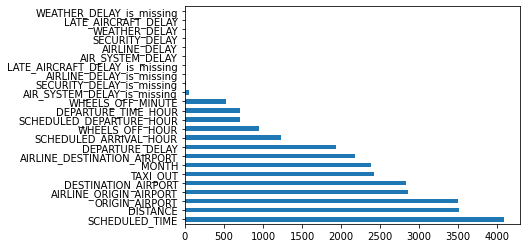

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


KeyboardInterrupt: ignored

In [12]:
import numpy as np
import matplotlib.pyplot as plt

sel_cols=cols
print(sel_cols,Y_train.OUTCOME.mean(),Y_test.OUTCOME.mean())

def runLGBMClassifierModel():
  model=LGBMClassifier(num_iterations=100,bagging_fraction=0.4,feature_fraction=0.7,lambda_l1=3,max_bin=125,min_data_in_leaf=300,num_leaves=300,lambda_l2=8,learning_rate=0.2,max_depth=40)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  sel_X_valid=X_valid[sel_cols]
  eval_set = [(sel_X_test, Y_test)]
  model.fit(sel_X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

  print("Test dataset:")
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)

  print("\n")

  print("Validation dataset:")
  pred=model.predict(sel_X_valid)
  print("predictions are ",pred)
  report(Y_valid,pred)

  
  print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
  #plot graph of feature importances for better visualization
  feat_importances = pd.Series(model.feature_importances_, index=sel_cols)
  feat_importances.nlargest(26).plot(kind='barh')
  plt.show()

  X=pd.concat([sel_X_train[:4285506],sel_X_test,sel_X_valid])
  y=pd.concat([Y_train[:4285506],Y_test,Y_valid])
  cross_validation(model,X,y)

runLGBMClassifierModel()

['MONTH', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'SCHEDULED_TIME', 'AIRLINE_ORIGIN_AIRPORT', 'AIRLINE_DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR', 'WHEELS_OFF_HOUR', 'AIR_SYSTEM_DELAY_is_missing'] 0.5 0.2940363992608305


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_logloss: 0.569479	valid_0's binary_logloss: 0.569479
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.496275	valid_0's binary_logloss: 0.496275
[3]	valid_0's binary_logloss: 0.428993	valid_0's binary_logloss: 0.428993
[4]	valid_0's binary_logloss: 0.384118	valid_0's binary_logloss: 0.384118
[5]	valid_0's binary_logloss: 0.351167	valid_0's binary_logloss: 0.351167
[6]	valid_0's binary_logloss: 0.321787	valid_0's binary_logloss: 0.321787
[7]	valid_0's binary_logloss: 0.299552	valid_0's binary_logloss: 0.299552
[8]	valid_0's binary_logloss: 0.287327	valid_0's binary_logloss: 0.287327
[9]	valid_0's binary_logloss: 0.272573	valid_0's binary_logloss: 0.272573
[10]	valid_0's binary_logloss: 0.26186	valid_0's binary_logloss: 0.26186
[11]	valid_0's binary_logloss: 0.255889	valid_0's binary_logloss: 0.255889
[12]	valid_0's binary_logloss: 0.249588	valid_0's binary_logloss: 0.249588
[13]	valid_0's binary_logloss: 0.243674	valid_0's

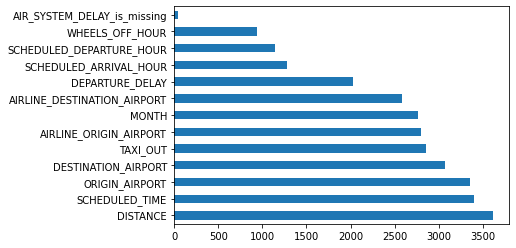

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

KeyboardInterrupt: ignored

In [13]:
import numpy as np
import matplotlib.pyplot as plt

sel_cols=cols_after_removing_recursive
print(sel_cols,Y_train.OUTCOME.mean(),Y_test.OUTCOME.mean())

def runLGBMClassifierModel():
  model=LGBMClassifier(extra_trees=True,num_iterations=100,bagging_fraction=0.4,feature_fraction=0.7,lambda_l1=3,max_bin=125,min_data_in_leaf=300,num_leaves=300,lambda_l2=8,learning_rate=0.2,max_depth=40)
  sel_X_train=X_train[sel_cols]
  sel_X_test=X_test[sel_cols]
  sel_X_valid=X_valid[sel_cols]
  eval_set = [(sel_X_test, Y_test)]
  model.fit(sel_X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

  print("Test dataset:")
  pred=model.predict(sel_X_test)
  print("predictions are ",pred)
  report(Y_test,pred)

  print("\n")

  print("Validation dataset:")
  pred=model.predict(sel_X_valid)
  print("predictions are ",pred)
  report(Y_valid,pred)

  
  print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
  #plot graph of feature importances for better visualization
  feat_importances = pd.Series(model.feature_importances_, index=sel_cols)
  feat_importances.nlargest(26).plot(kind='barh')
  plt.show()

  X=pd.concat([sel_X_train[:4285506],sel_X_test,sel_X_valid])
  y=pd.concat([Y_train[:4285506],Y_test,Y_valid])
  cross_validation(model,X,y)

runLGBMClassifierModel()

In [0]:
cols[8:13]

['AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_ORIGIN_AIRPORT']

In [0]:
def runXGBoostModel():
  # fit model no training data
  model = XGBClassifier(learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=300, 
                      reg_alpha = 0.3,
                      max_depth=4,
                      n_jobs=10,
                      gamma=10)
  model.fit(X_train, Y_train)
  # make predictions for test data
  y_pred = model.predict(X_test)
  print("Initial predictions are ",y_pred)
  predictions = [round(value) for value in y_pred]
  # evaluate predictions
  report(Y_test,predictions)
  X=pd.concat([X_train,X_test])
  y=pd.concat([Y_train,Y_test])
  cross_validation(model,X,y)
  
runXGBoostModel()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[08:09:19] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Initial predictions are  [1 0 0 ... 0 0 0]
Test ROC AUC score: 0.86731179532437
Test accuracy score: 0.9062176437849815
Confusion matrix is  [[970241  38777]
 [ 95185 324232]]
Classification report is 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94   1009018
           1       0.89      0.77      0.83    419417

    accuracy                           0.91   1428435
   macro avg       0.90      0.87      0.88   1428435
weighted avg       0.91      0.91      0.90   1428435





NameError: ignored

In [0]:
def runXGBoostModel():
  # fit model no training data
  model = XGBClassifier()
  eval_set = [(X_test, Y_test)]
  model.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
  # make predictions for test data
  y_pred = model.predict(X_test)
  print("Initial predictions are ",y_pred)
  predictions = [round(value) for value in y_pred]
  # evaluate predictions
  report(Y_test,predictions)
  X=pd.concat([X_train,X_test])
  y=pd.concat([Y_train,Y_test])
  cross_validation(lgbclassifier,X,y)
  
runXGBoostModel()